# Regresión Logística - Clasificación de Imágenes

En este cuaderno vamos a clasificar imágenes del dataset [`digits`](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) que viene incluido en la librería `sklearn`. 
Es un dataset muy pequeño y tiene dígitos del 0 al 9. Para simplificar, solo vamos a clasificar entre los dígitos 0 y 1 (o entre 2 pares de dígitos cualesquiera).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rnutil
from sklearn import datasets
from sklearn import   metrics
from tensorflow import keras

rnutil: Los archivos de los conjuntos de datos que ofrece este paquete también están disponibles en https://github.com/facundoq/redes-neuronales-util/tree/main/rnutil/data para descargar de forma individual
rnutil: Agregando el parámetro local=True en las funciones rnutil.load_dataset_numpy, rnutil.load_dataset_pandas y rnutil.load_image se puede cargar una versión local de un archivo en lugar de la versión que ofrece este paquete.


In [2]:
def load_dataset(digitoA=0,digitoB=1):
    #Dataset de digitos
    digits = datasets.load_digits()

    #Nos quedamos solo con los dos dígitos
    
    indicesA=digits.target==digitoA
    indicesB=digits.target==digitoB
    indices=np.logical_or(indicesA,indicesB)
    digits.images=digits.images[indices]
    digits.target[indicesA]=0
    digits.target[indicesB]=1
    digits.target=digits.target[indices]
    
    return digits

# Mostrar 5 imagenes del training set con su clase
def plot_images(images,classes,images_to_show=10,title="True class"):
    plt.figure(dpi=100)
    images_and_labels = list(zip(images,classes))
    for index, (image, label) in enumerate(images_and_labels[:images_to_show]):
        plt.subplot(1, images_to_show, index + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        
        label = 0 if label <0.5 else 1
        plt.title(f'{title}: {label}',fontsize=6)
    plt.tight_layout()
    plt.show()

# Entrenamiento y visualización

A continuación, cargamos los datos, armamos un modelo de Regresión Logística binaria (2 clases) con función sigmoidea y entropía cruzada _binaria_ como función de error. Luego entrenamos el modelo y observamos como clasifica los ejemplos. Notar que para distinguir entre 1s y 7s el modelo suele tener problemas.



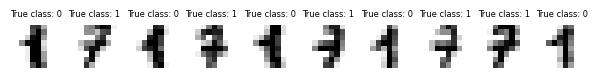

In [ ]:
# Cargar datos
# Nos quedamos solo con ejemplos de clase 1 y 7 (podés cambiar a otros para probar)
digits = load_dataset(digitoA=1,digitoB=7)
# Mostrar ejemplos de prueba
plot_images(digits.images,digits.target)

# Aplanar la imagen para tener una matrix (ejemplos,ancho x alto)
# y no una de (ejemplos,ancho,alto)
n_samples = len(digits.images)
x = digits.images.reshape((n_samples, -1))
y = digits.target


n,din=x.shape

#Entrenar regresión logistica
model = keras.Sequential([
    # la activación sigmoidea hace que la salida sea UNA probabilidad
    # para problemas binarios
    keras.layers.Dense(1,input_shape=(din,), activation='sigmoid')]) 

model.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='binary_crossentropy',  # entropía cruzada _binaria_
  # metricas para ir calculando en cada iteracion  
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

# Entrenamiento del modelo
print("Entrenando modelo...")
history=model.fit(x,y,epochs=100,batch_size=16,verbose=False)

rnutil.plot_loss_accuracy_keras(history)


# # Predecimos sobre el conjunto de entrenamiento
predicted = model.predict(x)

# Mostrar ejemplos de prueba
plot_images(digits.images,predicted,title="Pred. class")